In [1]:
import glob
import os.path

import pandas as pd
import numpy as np
from scipy.io import savemat

# 合并数据 供 PLS使用

In [5]:
mark = '4EPQ'
type = 'subtype1'
# 需要对 step2_group_subtype1 step2_group_subtype2 subID进行处理
# 读取两个CSV文件
file_2 = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/'+type+'_Zvalue.csv'
file_1 = '/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_'+mark+'.csv'



# Read the CSV files into DataFrames
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)

df_new = pd.merge(df2, df1, on='subID', how='inner')

# df_new.to_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/PLS/'+type+'_Zvalue_'+mark+'.csv', index=False)
print(df_new)
data = np.array(df_new.iloc[:, 1:])
print(data.shape)
# savemat('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/PLS/'+type+'_Zvalue_'+mark+'.mat', {'s1': data})
#-------------------------------------------

FileNotFoundError: [Errno 2] No such file or directory: '/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_4EPQ.csv'

# 找 CSV中的空值

In [6]:
import pandas as pd

import csv


def check_null_values_in_csv(file_path):
    null_positions = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # 读取表头
        for row_index, row in enumerate(reader, start=1):  # 从第一行数据开始遍历，索引从1开始（对应实际行数）
            for col_index, cell in enumerate(row):
                if cell.strip() == "":  # 判断单元格去除空白字符后是否为空
                    null_positions.append((row_index, col_index))
    return null_positions


# 读取CSV文件
file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/ClinicalInfo/Allscale.csv'  # 假设CSV文件路径为subtype1_HAMD_explCovLC.csv
df = pd.read_csv(file_path, header=None)

# 使用示例
#file_path = "your_file.csv"  # 替换为实际的CSV文件路径
result = check_null_values_in_csv(file_path)
if result:
    print("发现空值，位置如下：")
    for pos in result:
        print(f"行：{pos[0]}，列：{pos[1]}")
else:
    print("未发现空值")

未发现空值


# 多表合并

In [ ]:
import pandas as pd


file_paths = glob.glob("/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/ClinicalInfo/BP*.csv")
file_paths = []
file_paths.append('/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_Baseline/label.csv')

file_paths.append('/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_Baseline/PD_NP_HAMD17.csv')
file_paths.append('/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_Baseline/PD_NP_HAMA.csv')
file_paths.append('/Users/qingchen/Documents/Data/zhouLabData/Fan_DaraClearn/BrainProject/Import_data/PD_NP_Baseline/PD_NP_GAD.csv')
# 读取第一个文件作为基准表格
df_merged = pd.read_csv(file_paths[0])

# 从第二个文件开始，逐一合并
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path)
    # 根据 'subID' 合并数据，on='subID' 表示基于 'subID' 列合并
    df_merged = pd.merge(df_merged, df, on='subID', how='outer')  # 使用 outer 合并保留所有 subID

# 显示合并后的数据框
print(df_merged)

# 如果你想将合并后的表格保存为新的 CSV 文件：
df_merged.to_csv('./merged_data.csv', index=False)

In [85]:
import numpy as np
file_2 = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Step2_Z_AllMDD_LessThan_-196sum.csv'
file_1 ='/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/w8/SSRI/subtype2_8w.csv'


#Read the CSV files into DataFrames
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)

df_new = pd.merge(df2, df1, on='subID', how='inner')
df_new.to_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/w8/SSRI/subtype_2_Z_AllMDD_LessThan_-196sum.csv', index=False)



In [37]:
df_new = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/subtype1_Zvalue_HAMD_t.csv')
print(df_new)
data = np.array(df_new.iloc[:, 1:])
print(data.shape)
savemat('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/subtype1_ZvalueHAMD.mat', {'s1': data})

              subID     A8m_R    A8dl_R     A9l_R    A6dl_R     A6m_R  \
0    sub-1000013V01 -0.085755  0.545868  0.131313  0.433405 -0.547769   
1    sub-1000025V01 -0.334715  0.069610  0.164688 -0.217912  0.191029   
2    sub-1000034V01 -0.861231 -0.298780  0.010185 -0.266543 -1.434404   
3    sub-1000036V01  1.057736 -0.328753 -0.036175  0.886815  0.030469   
4    sub-1000037V01  0.002107  0.334358  0.666076 -0.609181 -0.617410   
..              ...       ...       ...       ...       ...       ...   
213   sub-MDD135V01 -1.598279 -1.000863 -1.498803 -1.363792 -0.595737   
214      sub-MDD136 -0.587863 -0.381793 -0.850668 -0.348042  0.491152   
215   sub-MDD137V01  0.924812 -0.179095  0.290794 -1.350359  0.916595   
216   sub-MDD139V01 -0.001537  0.885807 -0.448478  1.015278  0.067925   
217   sub-MDD142V01 -1.081120 -0.842552 -0.869523 -0.303595 -0.856690   

        A9m_R    A10m_R     46d_R     IFJ_R  ...  HAMD8  HAMD9  HAMD10  \
0    0.026781  0.091204 -0.412104  0.181992  ... 

In [102]:
import pandas as pd
import numpy as np
from scipy.io import savemat
df_new = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype1_ZvalueHAMD_5f.csv')
print(df_new)
data = np.array(df_new.iloc[:, 1:])
savemat('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype1_ZvalueHAMD_5f.mat', {'s1': data})

              subID     A8m_R    A8dl_R     A9l_R    A6dl_R     A6m_R  \
0    sub-1000013V01 -0.082935  0.559966  0.138968  0.415138 -0.563796   
1    sub-1000025V01 -0.313312  0.035748  0.240039 -0.253306  0.175633   
2    sub-1000034V01 -0.937493 -0.318220  0.033820 -0.275509 -1.360044   
3    sub-1000036V01  1.125561 -0.274003 -0.126661  0.742372  0.022863   
4    sub-1000037V01 -0.036665  0.344557  0.673921 -0.576997 -0.666629   
..              ...       ...       ...       ...       ...       ...   
227   sub-MDD135V01 -1.639936 -0.951291 -1.475780 -1.281846 -0.519949   
228      sub-MDD136 -0.546589 -0.287007 -0.872637 -0.266410  0.486969   
229   sub-MDD137V01  0.910761 -0.077416  0.233956 -1.445707  0.942187   
230   sub-MDD139V01 -0.065604  0.839316 -0.437408  1.088513  0.071330   
231   sub-MDD142V01 -0.990799 -0.864392 -0.972028 -0.294783 -0.977209   

        A9m_R    A10m_R     46d_R     IFJ_R  ...  HAMD13  HAMD14  HAMD15  \
0    0.080884  0.103094 -0.447737  0.132838  ..

Merge Data

In [16]:
file_2 = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/Resplapse_8w_noresp_subID.csv'
file_1 = '/Users/qingchen/Documents/code/NormativeModel/NM_Results/NM_HBR_1228-2024122801_test/Step_3th_OutliersCount/Step2_Z_AllMDD_LessThan_-196sum.csv'


#Read the CSV files into DataFrames
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)

df_new = pd.merge(df2, df1, on='subID', how='inner')
df_new.to_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/Resplapse_8w_noresp_0wLessThan_-196sum.csv', index=False)

In [5]:
import pandas as pd
Z_AllHCestimate = pd.read_pickle('/Volumes/QCI/NormativeModel/Test/'
                                 '/Z_mdd.pkl')
label = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/Feature/AllMDD_GrayVol_all246_III.csv')

brainRegion = label.columns.tolist()
del brainRegion[0:5]

print(len(brainRegion))

Z_AllHCestimate.columns = brainRegion

subIDs = label['subID']

zvalue = pd.concat([subIDs, Z_AllHCestimate], axis=1)

zvalue.to_csv('/Volumes/QCI/NormativeModel/Test/'
              'GrayVol246_Z_mdd.csv', index=False)


246


In [8]:
import scipy.stats as stats
import pandas as pd
subtype1_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/subtype1_ZvalueHAMD_5f.csv'
subtype2_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/subtype2_ZvalueHAMD_5f.csv'
subtype1_data = pd.read_csv(subtype1_path)
subtype2_data = pd.read_csv(subtype2_path)
subtype1_mark = subtype1_data['f5']
subtype2_mark = subtype2_data['f5']
t_stat, p_value = stats.ttest_ind(subtype1_mark, subtype2_mark)
print(' t_stat: ',t_stat,' p_value: ', p_value)

 t_stat:  2.0250091746059624  p_value:  0.04358020000177986


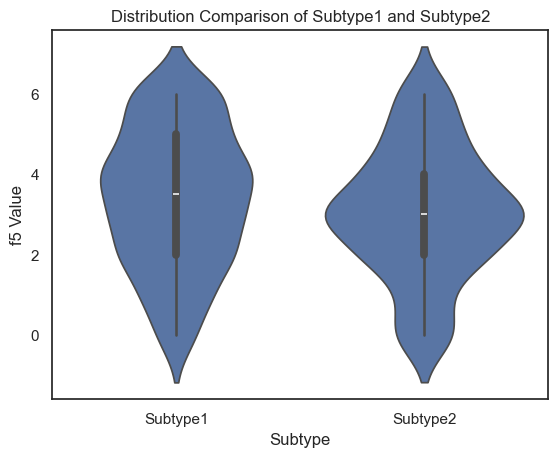

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# 准备用于绘制小提琴图的数据，将两个亚型的数据合并到一个DataFrame中，并添加一列用于区分亚型
data_for_plot = pd.DataFrame({
    'Value': pd.concat([subtype1_mark, subtype2_mark]),
    'Subtype': ['Subtype1'] * len(subtype1_mark) + ['Subtype2'] * len(subtype2_mark)
})

# 绘制小提琴图
sns.violinplot(x='Subtype', y='Value', data=data_for_plot)

# 设置图形标题、坐标轴标签等
plt.title("Distribution Comparison of Subtype1 and Subtype2")
plt.xlabel("Subtype")
plt.ylabel("Sleep Value")

# 展示图形
plt.show()

In [17]:
import scipy.stats as stats
import pandas as pd
subtype1_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/Longitudinal/PDND_Zvalue_HAMD_52w_diff.csv'
subtype2_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/Longitudinal/PDND_Zvalue_HAMD_52w_diff.csv'
subtype1_data = pd.read_csv(subtype1_path)
subtype2_data = pd.read_csv(subtype2_path)
subtype1_mark = subtype1_data['HAMD_0w']
subtype2_mark = subtype2_data['HAMD17_52w']
t_stat, p_value = stats.ttest_ind(subtype1_mark, subtype2_mark)
print(' t_stat: ',t_stat,' p_value: ', p_value)

 t_stat:  15.88972114741281  p_value:  3.70649060139629e-35


Brain Map

In [19]:
import nibabel as nib
import numpy as np
from scipy.io import savemat
import pandas as pd

# 模板文件路径
template_path = '/Users/qingchen/Documents/Data/template/BrainnetomeAtlas/BN_Atlas_freesurfer/fsaverage/fsaverage_LR32k/fsaverage.BN_Atlas.32k_fs_LR.dlabel.nii'
template = template_path
template = nib.load(template)
label=template.get_fdata()
label[label > 210] -= 210


# 加载 CSV 文件
csv_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/Longitudinal/Predict/SVR/aRes_10k_index79_meanweight.csv'
weight_data = pd.read_csv(csv_path)

# 读取 结果指标 列，可以是SMSE\MSLL
smse_values = weight_data['weight_mean'].values


# 创建一个新的数组用于存储映射值
mapped_data = np.zeros_like(label)


for i in range(1, 211):
    index = np.where(label == i)

    mapped_data[index] = smse_values[i - 1]

# 检查映射后的数据形状
print("Mapped data shape:", mapped_data.shape)

# 创建 dscalar.nii 文件
scalar_axis = nib.cifti2.cifti2_axes.ScalarAxis(['loading'])
brain_model_axis = template.header.get_axis(1)
scalar_header = nib.cifti2.Cifti2Header.from_axes((scalar_axis, brain_model_axis))
scalar_img = nib.Cifti2Image(mapped_data, header=scalar_header)
scalar_img.to_filename('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/Longitudinal/Predict/SVR/BrainHAMD_weight.dscalar.nii')



Mapped data shape: (1, 59412)


In [60]:
import pandas as pd
import numpy as np

def pkltocsv(Resultpath,labelpath,columnsname,opath,mark):
    Rho_AllHCestimate = pd.read_pickle(Resultpath+'Rho_'+mark+'.pkl')
    print('r - ',Rho_AllHCestimate.shape)
    pRho_AllHCestimate = pd.read_pickle(Resultpath+'pRho_'+mark+'.pkl')

    SMSE_AllHCestimate = pd.read_pickle(Resultpath+'SMSE_'+mark+'.pkl')

    RMSE_AllHCestimate = pd.read_pickle(Resultpath+'RMSE_'+mark+'.pkl')

    yhat_AllHCestimate = pd.read_pickle(Resultpath+'yhat_'+mark+'.pkl')
    print('yhat- ',yhat_AllHCestimate.shape)
    EXPV_AllHCestimate = pd.read_pickle(Resultpath + 'EXPV_' + mark + '.pkl')
    print('EXPV - ',EXPV_AllHCestimate.shape)
    MSLL_AllHCestimate = pd.read_pickle(Resultpath + 'MSLL_' + mark + '.pkl')

    label = pd.read_csv(labelpath)
    brainRegion = label.columns.tolist()
    a = brainRegion[6:]
    regions = pd.DataFrame(a)
    print(regions)
    print(len(regions))
    # m = []
    # for num,re in enumerate(brainRegion):
    #     a = yhat_AllHCestimate[num]
    #     b = label[re]
    #     MAE = np.mean(np.abs(a - b))
    #     m.append(MAE)
    # mae = pd.DataFrame(m)

    df_sum = pd.concat([regions, Rho_AllHCestimate, pRho_AllHCestimate, RMSE_AllHCestimate, SMSE_AllHCestimate, EXPV_AllHCestimate,MSLL_AllHCestimate],
                       axis=1)  # 将两列拼接在一起，axis=1 表示按列拼接
    df_sum.columns = columnsname
    df_sum.to_csv(opath)
columnsname = ['Regions','Rho_estimate', 'pRho_estimate', 'RMSE_estimate', 'SMSE', 'EXPV','MSLL']

Resultpath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_122802/NMResults/'
labelpath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_122802/NMResults/allHC_te.csv'
opath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_122802/StaResults/hbr_estimate_GrayVol246_ResSum.csv'
mark = 'estimate'
pkltocsv(Resultpath, labelpath, columnsname, opath, mark)
#
# Resultpath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1018/NMResults/'
# mddlabel = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1018/NMResults/allHC_anding_te.csv'
# opath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1018/StaResults/hbr_transfer_GrayVol246_ResSum.csv'
# mark = 'transfer'
# pkltocsv(Resultpath,mddlabel,columnsname,opath,mark)
#
# Resultpath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1028/NMResults/'
# mddlabel = '/Volumes/QCI/NormativeModel/FeatureData/StructureFeature_246/allstruc/nocombat/allMDDGrayVol246_sum.csv'
# opath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1028/StaResults/hbr_mdd_GrayVol246_ResSum.csv'
# mark = 'mdd'
# pkltocsv(Resultpath,mddlabel,columnsname,opath,mark)

r -             0
0   0.713438
1   0.708184
2   0.676125
3   0.495377
4   0.499246
5   0.610544
6   0.493040
7   0.538494
8   0.289458
9   0.413232
10  0.427181
11  0.590544
12  0.446261
13  0.419424
14  0.571588
15  0.350828
16  0.423167
17  0.257617
18  0.502016
19  0.570124
20  0.441819
21  0.426230
22  0.294465
23  0.522499
24  0.672633
25  0.831204
26  0.578677
27  0.461117
28  0.545128
29  0.712388
30  0.564481
31  0.638967
32  0.570665
33  0.590684
34  0.372357
35  0.438742
yhat-  (222, 36)
EXPV -  (36, 1)
            0
0       A8m_R
1      A8dl_R
2       A9l_R
3      A6dl_R
4       A6m_R
..        ...
241    Otha_R
242   cTtha_L
243   cTtha_R
244  lPFtha_L
245  lPFtha_R

[246 rows x 1 columns]
246


亚型间的 HAMD每条维度之间的差异

In [98]:
# import scipy.stats as stats
# import pandas as pd
# import numpy as np
# def cohen_d(group1, group2):
#     """
#     计算Cohen's d
#     :param group1: 第一组数据（一维数组或列表）
#     :param group2: 第二组数据（一维数组或列表）
#     :return: Cohen's d值
#     """
#     n1, n2 = len(group1), len(group2)
#     mean1, mean2 = np.mean(group1), np.mean(group2)
#     var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
#     pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
#     return (mean1 - mean2) / pooled_std
#
#
# subtype1_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/subtype1_ZvalueHAMD_5f.csv'
# subtype2_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/subtype2_ZvalueHAMD_5f.csv'
# subtype1_data = pd.read_csv(subtype1_path)
# subtype2_data = pd.read_csv(subtype2_path)
# subtype1_mark = subtype1_data['f5']
# subtype2_mark = subtype2_data['f5']
# t_stat, p_value = stats.ttest_ind(subtype1_mark, subtype2_mark)
# cod = cohen_d(subtype1_mark, subtype2_mark)
# print(cod)
# print(' t_stat: ',t_stat,' p_value: ', p_value)
#
# import seaborn as sns
# import matplotlib.pyplot as plt
# # 准备用于绘制小提琴图的数据，将两个亚型的数据合并到一个DataFrame中，并添加一列用于区分亚型
# data_for_plot = pd.DataFrame({
#     'Value': pd.concat([subtype1_mark, subtype2_mark]),
#     'Subtype': ['Subtype1'] * len(subtype1_mark) + ['Subtype2'] * len(subtype2_mark)
# })
# fig, ax = plt.subplots(figsize=(10, 6))
# palette = {'HCs': '#8BACD1', 'Subtype1': '#C17F9E', 'Subtype2': '#80B1D3'}
# # 绘制小提琴图
# sns.violinplot(x='Subtype', y='Value', data=data_for_plot, palette=palette)
# ax.set_yticks([0, 2, 4, 6, 8])
# ax.tick_params(axis='y', labelsize=12)
# ax.tick_params(axis='x', labelsize=12)
# # 去掉上面和右边的线条
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
#
# # 自定义x轴和y轴的线条粗细
# ax.spines['bottom'].set_linewidth(1.0)
# ax.spines['left'].set_linewidth(1.0)
# # 设置图形标题、坐标轴标签等
# #plt.title("Distribution Comparison of Subtype1 and Subtype2")
# plt.xlabel("Subtype", size=14)
# plt.ylabel("Sleep Score", size=14)
#
# # 展示图形
# plt.show()
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.stats.multitest as smm
import seaborn as sns
import matplotlib.pyplot as plt


def cohen_d(group1, group2):
    """
    计算Cohen's d
    :param group1: 第一组数据（一维数组或列表）
    :param group2: 第二组数据（一维数组或列表）
    :return: Cohen's d值
    """
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std


subtype1_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype1_ZvalueHAMD_5f.csv'
subtype2_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype2_ZvalueHAMD_5f.csv'
subtype1_data = pd.read_csv(subtype1_path)
subtype2_data = pd.read_csv(subtype2_path)
a = ['f1', 'f2', 'f3', 'f4', 'f5']
# a = ['HAMD1','HAMD2','HAMD3','HAMD4','HAMD5','HAMD6','HAMD7','HAMD8','HAMD9','HAMD10','HAMD11','HAMD12','HAMD13','HAMD14','HAMD15','HAMD16','HAMD17']
pbox = []
for i in a:
    subtype1_mark = subtype1_data[i]

    subtype2_mark = subtype2_data[i]

    t_stat, p_value = stats.ttest_ind(subtype1_mark, subtype2_mark)
    pbox.append(p_value)
    cod = cohen_d(subtype1_mark, subtype2_mark)

    #print(cod)
    print(i, ' t_stat: ', t_stat, ' p_value: ', p_value)
rejected, fdr_pvalue, _, _ = smm.multipletests(pbox, method='fdr_bh')

print(fdr_pvalue)
# # 准备用于绘制箱体图的数据，将两个亚型的数据合并到一个DataFrame中，并添加一列用于区分亚型
# data_for_plot = pd.DataFrame({
#     'Value': pd.concat([subtype1_mark, subtype2_mark]),
#     'Subtype': ['Subtype1'] * len(subtype1_mark) + ['Subtype2'] * len(subtype2_mark)
# })
#
# fig, ax = plt.subplots(figsize=(10, 6))
# palette = {'HCs': '#8BACD1', 'Subtype1': '#C17F9E', 'Subtype2': '#80B1D3'}
#
# # 绘制箱体图
# box_plot = sns.boxplot(x='Subtype', y='Value', data=data_for_plot, palette=palette, width=0.3)
#
# # 获取箱线图的各个组成部分，以便设置线条宽度
# lines = box_plot.lines
# for line in lines:
#     line.set_linewidth(1.5)  # 将线宽设置为2.0，可根据实际需求调整该值
#
# ax.set_yticks([0, 2, 4, 6, 8])
# ax.tick_params(axis='y', labelsize=12)
# ax.tick_params(axis='x', labelsize=12)
#
# # 去掉上面和右边的线条
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
#
# # 自定义x轴和y轴的线条粗细
# ax.spines['bottom'].set_linewidth(1.0)
# ax.spines['left'].set_linewidth(1.0)
#
# # 设置图形标题、坐标轴标签等
# # plt.title("Distribution Comparison of Subtype1 and Subtype2")
# plt.xlabel("Subtype", size=14)
# plt.ylabel("Sleep Score", size=14)
#
# # 展示图形
# plt.show()

f1  t_stat:  1.1424927296547793  p_value:  0.25396671246571517
f2  t_stat:  -0.6629273077872927  p_value:  0.5077779651977941
f3  t_stat:  -5.4412760765633195  p_value:  9.485475436628843e-08
f4  t_stat:  0.2957780069348775  p_value:  0.7675607564343633
f5  t_stat:  1.1326636546105286  p_value:  0.25806782146981583
[4.30113036e-01 6.34722456e-01 4.74273772e-07 7.67560756e-01
 4.30113036e-01]


In [96]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.stats.multitest as smm
import glob
import pandas as pd
# 第一步 构建数据 TOC和行为拼接到 csv
csvdata = glob.glob("/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/ClinicalInfo/*.csv")

for b in csvdata:
  box = []
  name = b.split('/')[-1].split('_')[-1][:-4]
  print(name)
  for i in range(1, 3):
      file_1 = '/Volumes/QCI/NormativeModel/Results/Test1228/' \
                  'subtype' + str(i) + '_TOC.csv'

      df1 = pd.read_csv(file_1)
      df2 = pd.read_csv(b)
      df_new = pd.merge(df2, df1, on='subID', how='inner')

      box.append(df_new)
      df_new.to_csv('/Volumes/QCI/NormativeModel/Results/Test1228/TOC/subtype'+str(i)+'_TOC_'+name+'.csv', index=False)
print("Done")

# # 第二步计算相关
file_1 = '/Volumes/QCI/NormativeModel/Results/Test1228/TOC/*.csv'
csv = glob.glob(file_1)
for i in csv:

    sbty = i.split('/')[-1].split('_')
    beh = sbty[-1][:-3]
    stype = sbty[0]
    # Read the CSV files into DataFrames
    df1 = pd.read_csv(i)

    behscore = np.array(df1.iloc[:, 1])

    x = np.array(df1.iloc[:, 2])

    y = behscore

    corr, p_value = pearsonr(x, y)
    if p_value < 0.05:
        print(stype, '-', beh, ' pearson correlation:', corr, 'p-value:', p_value)

    scorr, sp_value = spearmanr(x, y)
    if sp_value < 0.05:
        print(stype, '-', beh, ' spearman correlation:', scorr, 'p-value:', sp_value)






age
BPX
CTQ
HAMD
GAD
HAMA
HCL
PSS
QIDS
SHAP
PHQ9
EPQE
EPQN
EPQL
EPQP
Done
subtype1 - age.  pearson correlation: -0.17019889408810326 p-value: 0.010034624488168003
subtype1 - age.  spearman correlation: -0.14430392347494078 p-value: 0.02937779086414815
subtype2 - GAD.  pearson correlation: 0.3038802033563976 p-value: 0.020392893281320046
subtype2 - GAD.  spearman correlation: 0.28784929630206013 p-value: 0.028446217376958263


In [114]:
import glob
import pandas as pd
from shutil import copy
import os

s1Path = "/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype2_TOC.csv"

subID = pd.read_csv(s1Path)['subID']

for i in subID:
    print(i)
    datapath = '/Volumes/QCI/Gradient_MDD/MDD_BN246FC/'+i+'_FC.mat'
    npath = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults/subtype2_246FC/'
    if not os.path.exists(datapath):
        continue;
    copy(datapath, npath +i+ '_FC.mat')


sub-1000002V01
sub-1000003V01
sub-1000012V01
sub-1000024V01
sub-1000052V01
sub-1000053V01
sub-1000060V01
sub-1000063V01
sub-1000064V01
sub-1000068V01
sub-1000083V01
sub-1000115V01
sub-1000122V01
sub-1000128V01
sub-1000140V01
sub-1000153V01
sub-1000161V01
sub-1000168V01
sub-1000169V01
sub-1000218V01
sub-1000222V01
sub-1000250V01
sub-1000280V01
sub-1000286V01
sub-1000304V01
sub-1000309V01
sub-1000314V01
sub-1000355V01
sub-1000369V01
sub-1000394V01
sub-1000413V01
sub-1000444V01
sub-1000447V01
sub-1000465V01
sub-1000468V01
sub-1000527V01
sub-1000535V01
sub-1000541V01
sub-1000548V01
sub-1000559V01
sub-1000587V01
sub-1000596V01
sub-1000607V01
sub-1000618V01
sub-1000642V01
sub-1000667V01
sub-1000735V01
sub-1000741V01
sub-1000818V01
sub-1000849V01
sub-1000974V01
sub-1000977V01
sub-1001006V01
sub-1001020V01
sub-1001028V01
sub-MDD003
sub-MDD005V01
sub-MDD006
sub-MDD007
sub-MDD009
sub-MDD009V01
sub-MDD010
sub-MDD012V01
sub-MDD016V01
sub-MDD017V01
sub-MDD018
sub-MDD018V01
sub-MDD021
sub-MDD021V01


箱体图

EPQE t_stat: 2.467488009006053 p_value: 0.014590982333934849


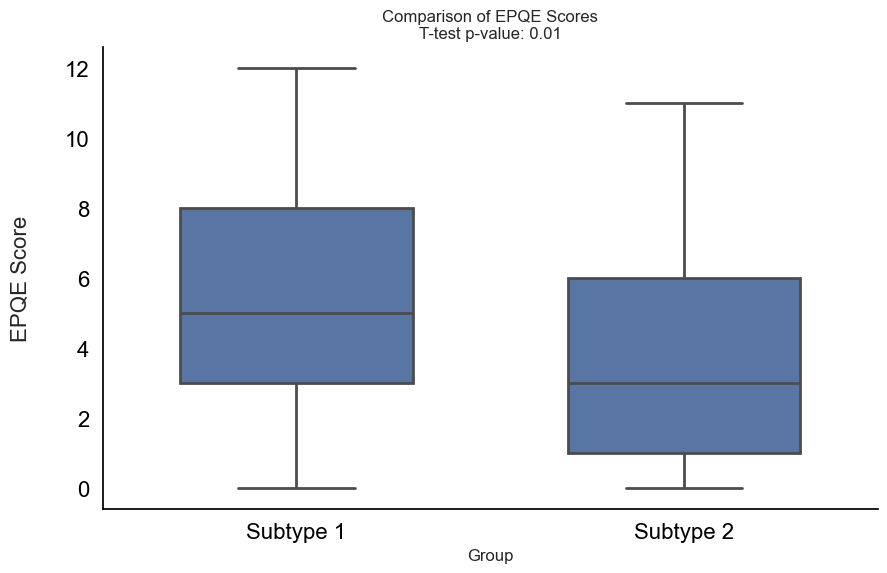

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置列名
Mark = 'EPQE'

# 读取数据并提取所需列
subtype1_data = pd.read_csv("/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/subtypeClinical/Step5_1_subtype1_Zvalue_EPQE.csv")
subtype1_mark = subtype1_data[Mark]

subtype2_data = pd.read_csv("/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/subtypeClinical/Step5_1_subtype2_Zvalue_EPQE.csv")
subtype2_mark = subtype2_data[Mark]

# 独立样本 T 检验
t_stat, p_value = stats.ttest_ind(subtype1_mark, subtype2_mark)
print(Mark, f't_stat: {t_stat}', f'p_value: {p_value}')

# 为每组数据添加标签
subtype1_data['Group'] = 'Subtype1'
subtype2_data['Group'] = 'Subtype2'

# 合并数据
combined_data = pd.concat([subtype1_data[['EPQE', 'Group']], subtype2_data[['EPQE', 'Group']]])

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.set(style="white")

sns.boxplot(data=combined_data, x='Group', y='EPQE', linewidth=2, width=0.6, fliersize=6)

# 设置标签和标题
plt.xticks([0, 1], ['Subtype 1', 'Subtype 2'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(Mark + ' Score', labelpad=25, fontsize=16)
plt.title(f'Comparison of {Mark} Scores\nT-test p-value: {p_value:.2f}', fontsize=12)

# 美化轴线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# 设置刻度颜色
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

plt.show()


In [67]:
import pandas as pd
from scipy.stats import chi2_contingency
file1_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/' \
             'subtype1_GrayVol246_Z_AllMDD_HAMD_2w.csv'
file2_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/' \
             'subtype2_GrayVol246_Z_AllMDD_HAMD_2w.csv'
# 读取两个CSV文件
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
responemark_counts_1 = df1['responemark'].value_counts()
responemark_counts_2 =df2['responemark'].value_counts()
contingency_table = pd.DataFrame({
    "Subtype 1": [responemark_counts_1.get(1, 0), responemark_counts_1.get(0, 0)],
    "Subtype 2": [responemark_counts_2.get(1, 0), responemark_counts_2.get(0, 0)]
}, index=["Effective (1)", "Not Effective (0)"])
# 创建列联表
#contingency_table = pd.crosstab(df1['responemark'], df2['responemark'])

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 输出结果
print('卡方值:', chi2)
print('p值:', p)

卡方值: 0.0
p值: 1.0


In [68]:
contingency_table

,Subtype 1,Subtype 2
Effective (1),26,13
Not Effective (0),61,29


In [85]:
import pandas as pd

# 读取 region246_network_Yeo 表格
region_mapping_path = '/Users/qingchen/Documents/Data/template/BrainnetomeAtlas/region246_network_Yeo.csv'
region_mapping_df = pd.read_csv(region_mapping_path)

# 提取 regions 和 Yeo_7network 列，建立映射
region_to_network = region_mapping_df.set_index('regions')['Yeo_7network'].to_dict()
# 读取 subtype1_2_Z8w_HAMD_8w 表格
subtype_data_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype1_2_Z8w_HAMD_8w.csv'
subtype_data_df = pd.read_csv(subtype_data_path)

# # 找到从 A8m_R 开始的列
data_of_interest = subtype_data_df.iloc[:,6:]

# 建立 Yeo 7 网络的数据结构
network_data = {network: [] for network in set(region_to_network.values())}

# 将数据分配到对应的 Yeo 7 网络
for column in data_of_interest.columns:
    print(column)
    #region_name = column.split('_')[0]  # 假设列名包含脑区名作为前缀
    region_name = column
    if region_name in region_to_network:
        network = region_to_network[region_name]
        network_data[network].append(data_of_interest[column])

# 计算每个网络中的脑区求和和平均值
network_averages = {}
for network, data_list in network_data.items():
    if data_list:  # 确保网络中有数据
        network_df = pd.concat(data_list, axis=1)
        network_sum = network_df.sum(axis=1)
        network_mean = network_sum / len(data_list)
        network_averages[network] = network_mean

# 将结果保存为 DataFrame
result_df = pd.DataFrame(network_averages)
result_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/network_level_averages.csv'
result_df.to_csv(result_path, index=False)

print(f"计算完成，结果已保存到 {result_path}")


A8m_R
A8dl_R
A9l_R
A6dl_R
A6m_R
A9m_R
A10m_R
46d_R
IFJ_R
A46_R
46v_R
A8vl_R
A6vl_R
A10l_R
A44d_R
IFS_R
A45c_R
A45r_R
A44op_R
A44v_R
A14m_R
47o_R
A11l_R
A11m_R
A13_R
47l_R
A4hf_R
A6cdl_R
A4ul_R
A4t_R
A4tl_R
A6cvl_R
3ll_R
A4ll_R
A38m_R
42_R
TE1.2_R
A22c_R
A38l_R
A22r_R
A21c_R
A21r_R
A37dl_R
aSTS_R
A20iv_R
A37elv_R
A20r_R
A20il_R
A37vl_R
A20cl_R
A20cv_R
A20rv_R
A37mv_R
A37lv_R
36r_R
36c_R
TL_R
34_R
TI_R
TH_R
rpSTS_R
cpSTS_R
A7r_R
A7c_R
A5l_R
A7pc_R
A7ip_R
A39c_R
A39rd_R
A40rd_R
A40c_R
A39rv_R
A40rv_R
A7m_R
A5m_R
dmPOS_R
A31_R
3ulhf_R
3tonIa_R
A2_R
3tru_R
G_R
vIa_R
dIa_R
vlg_R
dIg_R
dId_R
A23d_R
A24rv_R
A32p_R
A23v_R
A24cd_R
A23c_R
A32sg_R
cLinG_R
rCunG_R
cCunG_R
rLinG_R
vmPOS_R
mOccG_R
MT+_R
OPC_R
iOccG_R
msOccG_R
lsOccG_R
A8m_L
A8dl_L
A9l_L
A6dl_L
A6m_L
A9m_L
A10m_L
46d_L
IFJ_L
A46_L
46v_L
A8vl_L
A6vl_L
A10l_L
A44d_L
IFS_L
A45c_L
A45r_L
A44op_L
A44v_L
A14m_L
47o_L
A11l_L
A11m_L
A13_L
47l_L
A4hf_L
A6cdl_L
A4ul_L
A4t_L
A4tl_L
A6cvl_L
3ll_L
A4ll_L
A38m_L
42_L
TE1.2_L
A22c_L
A38l_L
A22r_L
A2

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import statsmodels.stats.multitest as smm
def cohen_d(group1, group2):
    """
    计算Cohen's d
    :param group1: 第一组数据（一维数组或列表）
    :param group2: 第二组数据（一维数组或列表）
    :return: Cohen's d值
    """
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std
asd1 = pd.read_csv(
    '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/TOC_SUM_SSRI/First_Medication_SSRI_8w_noresp_Positive_GreaterThan_196sum.csv', index_col=0)
data1 = list(asd1['sum_196'])

asd = pd.read_csv(
    '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Medication/TOC_SUM_SSRI/Relaps_Medication_SSRI_8w_resp_Positive_GreaterThan_196sum.csv', index_col=0)
data2 = list(asd['sum_196'])

t_stat, p_value = ttest_ind(data1, data2)
cond = cohen_d(data1,data2)
print(f' - pvalue： ', p_value, ' cohen-d：', cond)

 - pvalue：  0.8762037516223793  cohen-d： 0.0584786991961082
